In [1]:
import pandas as pd
import numpy as numpy

In [5]:
df = pd.read_csv("data_assignment.csv")

In [50]:
#Part 1 – Data Preparation and Pre-processing

In [7]:
df = pd.read_csv('data_assignment.csv')
print("The Dataset consists of: ", df.shape[0], " rows and ", df.shape[1], " columuns")
df.head(10)

The Dataset consists of:  149999  rows and  13  columuns


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN
5,37404307,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN
6,37404355,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07T00:00:00.000Z,Adelaide,NaN,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,NaN,0,30,NaN
7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0,30,NaN
8,37404301,Telemarketer,Reventon Investments,2018-10-07T00:00:00.000Z,Melbourne,CBD & Inner Suburbs,Call Centre & Customer Service,Sales - Outbound,Market leading investment & financial services...,NaN,0,30,NaN
9,37404286,Casual Dish Hand in Brighton,Jora Local,2018-10-07T00:00:00.000Z,Melbourne,Bayside & South Eastern Suburbs,Hospitality & Tourism,Kitchen & Sandwich Hands,A restaurant in Brighton is seeking a casual D...,NaN,0,30,NaN


In [8]:
df.dtypes

Id                    int64
Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object

In [9]:
df = df.assign(AverageSalary= (df["LowestSalary"] + df["HighestSalary"])/2 )

#Clean date since the time is not correct
df["Date"] = df["Date"].replace(to_replace=r'T.*', value='', regex=True)
df["Date"] = pd.to_datetime(df["Date"])

date_ranges = df.groupby("Date").count()
print(len(date_ranges.index))
print(date_ranges.index[0])
print(date_ranges.index[len(date_ranges.index) - 1])

44
2018-10-01 00:00:00
2018-11-13 00:00:00


In [10]:
locations = df.groupby("Location").count()
print(len(locations.index))
locations["Location"] = locations.index
locations["Count"] = locations["Id"]
locations = locations.sort_values(by=["Count"], ascending =False)
print(locations)

65
                                         Id  Title  Company   Date   Area  \
Location                                                                    
Sydney                                46357  46357    44880  46357  41100   
Melbourne                             35315  35315    33916  35315  31271   
Brisbane                              16538  16538    15863  16538  13448   
Perth                                  9913   9913     9595   9913   7677   
Adelaide                               4998   4998     4740   4998      0   
...                                     ...    ...      ...    ...    ...   
Yorke Peninsula & Clare Valley           78     78       76     78      0   
Tumut, Snowy & Monaro                    69     69       68     69      0   
Somerset & Lockyer                       56     56       54     56      0   
Fleurieu Peninsula & Kangaroo Island     53     53       50     53      0   
Central & South East TAS                 36     36       34     36      0

In [11]:
classifications = df.groupby("Classification").count()
print(len(classifications.index))
classifications["Classification"] = classifications.index
classifications["Count"] = classifications["Id"]
classifications = classifications.sort_values(by=["Count"], ascending =False)
print(classifications)

30
                                           Id  Title  Company   Date  \
Classification                                                         
Information & Communication Technology  16661  16661    16390  16661   
Trades & Services                       14125  14125    12937  14125   
Healthcare & Medical                    12515  12515    12016  12515   
Hospitality & Tourism                   11818  11818    11332  11818   
Manufacturing, Transport & Logistics     9608   9608     8873   9608   
Administration & Office Support          7636   7636     7264   7636   
Accounting                               7075   7075     6847   7075   
Education & Training                     7033   7033     6845   7033   
Retail & Consumer Products               6496   6496     6242   6496   
Sales                                    6281   6281     5935   6281   
Construction                             6254   6254     5995   6254   
Government & Defence                     5926   5926     5890

In [12]:
df_subIT = df[df["Classification"]=="Information & Communication Technology"].groupby("SubClassification").count()
print(len(df_subIT.index))
df_subIT["SubClassification"] = df_subIT.index
df_subIT["Count"] = df_subIT["Id"]
df_subIT = df_subIT.sort_values(by=["Count"], ascending =False)
print(df_subIT)

22
                                         Id  Title  Company  Date  Location  \
SubClassification                                                             
Developers/Programmers                 3069   3069     2979  3069      3069   
Business/Systems Analysts              2076   2076     2047  2076      2076   
Programme & Project Management         1665   1665     1641  1665      1665   
Architects                             1110   1110     1104  1110      1110   
Engineering - Software                 1087   1087     1071  1087      1087   
Help Desk & IT Support                 1074   1074     1038  1074      1074   
Networks & Systems Administration       927    927      916   927       927   
Consultants                             849    849      837   849       849   
Other                                   742    742      739   742       742   
Testing & Quality Assurance             606    606      597   606       606   
Management                              561    56

In [13]:
df["SalaryRange"] = df["LowestSalary"].astype(str) + "-" + df["HighestSalary"].astype(str)
df_SalaryRanges = df.groupby("SalaryRange").count()
print(len(df_SalaryRanges.index))
df_SalaryRanges["SalaryRange"] = df_SalaryRanges.index
df_SalaryRanges["Count"] = df_SalaryRanges["Id"]
df_SalaryRanges = df_SalaryRanges.sort_values(by=["Count"], ascending =False)
print(df_SalaryRanges)

11
                Id  Title  Company   Date  Location   Area  Classification  \
SalaryRange                                                                  
0-30         27606  27606    26254  27606     27606  17552           27606   
40-50        17708  17708    16474  17708     17708  10810           17708   
60-70        14108  14108    13464  14108     14108   8882           14108   
100-120      13062  13062    12815  13062     13062   8109           13062   
70-80        12932  12932    12546  12932     12932   7954           12932   
80-100       12582  12582    12265  12582     12582   7481           12582   
50-60        12559  12559    11894  12559     12559   8191           12559   
30-40        12441  12441    11872  12441     12441   7570           12441   
150-200      11738  11738    11601  11738     11738   7332           11738   
120-150      10651  10651    10500  10651     10651   6919           10651   
200-250       4612   4612     4552   4612      4612   2696   

In [14]:
df_jobtypes = df.groupby("JobType").count()
for jobtype in df_jobtypes.index:
    df_JobInType = df[df["JobType"] == jobtype]
    df_JobInType = df_JobInType.groupby("SalaryRange").count()
    print('-----------{}------------'.format(jobtype))
    print(df_JobInType)

-----------Casual/Vacation------------
               Id  Title  Company  Date  Location  Area  Classification  \
SalaryRange                                                               
0-30         2571   2571     2400  2571      2571  1417            2571   
100-120       290    290      277   290       290   108             290   
120-150       164    164      162   164       164    80             164   
150-200       212    212      210   212       212    83             212   
200-250        54     54       49    54        54    29              54   
30-40        3367   3367     3252  3367      3367  1984            3367   
40-50        3186   3186     2925  3186      3186  1657            3186   
50-60        1702   1702     1615  1702      1702   940            1702   
60-70         993    993      939   993       993   526             993   
70-80         542    542      519   542       542   268             542   
80-100        415    415      407   415       415   164      

In [15]:
df = df.drop(['Id'], axis=1)
duplicateRowsDF = df[df.duplicated()]
print(len(duplicateRowsDF))
df = df.drop_duplicates()

611


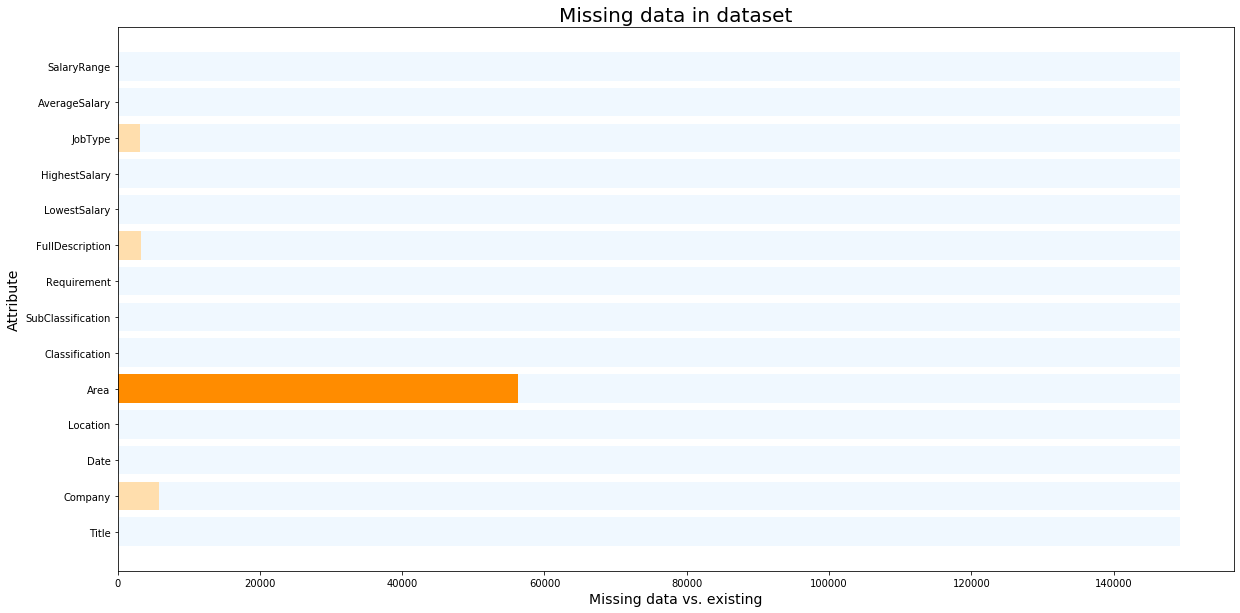

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
def colorize_bar(value, max_value):
    low, high = max_value * 0.2, max_value * 0.66
    if(value <= low):
        return 'navajowhite'
    elif(value >= high):
        return 'darkorange'
    else:
        return 'orange'

    
nulls = df.isnull().sum()
cols = [colorize_bar(n, nulls.max()) for n in nulls]

total_data = [df.shape[0]] * df.shape[1]
plt.figure(figsize=(20,10))
plt.barh(df.columns.values,total_data, color='aliceblue')
plt.barh(df.columns.values,nulls, color=cols)

plt.ylabel('Attribute', size=14)
plt.xlabel('Missing data vs. existing', size=14)
plt.title('Missing data in dataset', size=20)

plt.show();

In [51]:
#Part 2 – Data Analysis and Interpretation

Text(0.5, 0, 'Jobs distribution by average salary')

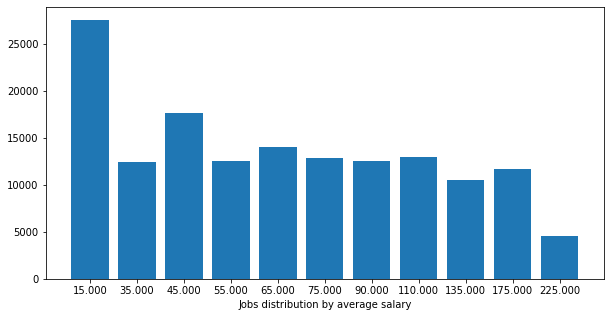

In [20]:
import matplotlib.pyplot as plt
df["Id"] = range(len(df))
averageSalaryDf = df.groupby('AverageSalary').count()
averageSalaryDf['AverageSalary'] = (averageSalaryDf.index).astype(float).map('{:,.0f}.000'.format)
averageSalaryDf['Count'] = averageSalaryDf["Id"]
plt.figure(figsize=(10,5))
plt.bar( averageSalaryDf["AverageSalary"],  averageSalaryDf["Count"])
plt.xlabel('Jobs distribution by average salary')

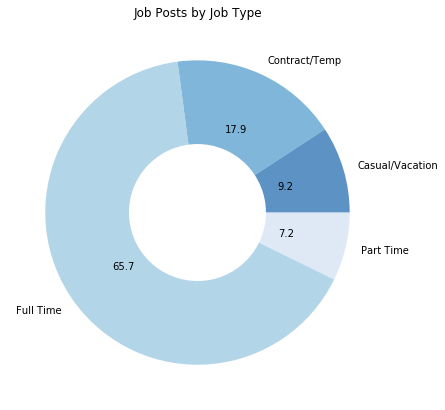

In [18]:
import seaborn as sns
df_jobtype_ranges = df[df['JobType'].isna()==False]
df_jobtype_ranges = df_jobtype_ranges.groupby('JobType').count()
df_jobtype_ranges['Label'] = df_jobtype_ranges.index
df_jobtype_ranges['Count'] = df_jobtype_ranges["Id"]

#salary ranges plot
fig, ax = plt.subplots(figsize=(7,7)) 
ax.pie(df_jobtype_ranges['Count'], colors=sns.color_palette("Blues_r", len(df_jobtype_ranges)),labels=df_jobtype_ranges['Label'],wedgeprops={'alpha':0.7},autopct='%1.1f')
ax.set_title('Job Posts by Job Type', loc='center')

# add centre circle to make it a donut
centre_circle2 = plt.Circle((0,0),0.45,color='black', fc='white',linewidth=0)
ax.add_patch(centre_circle2)

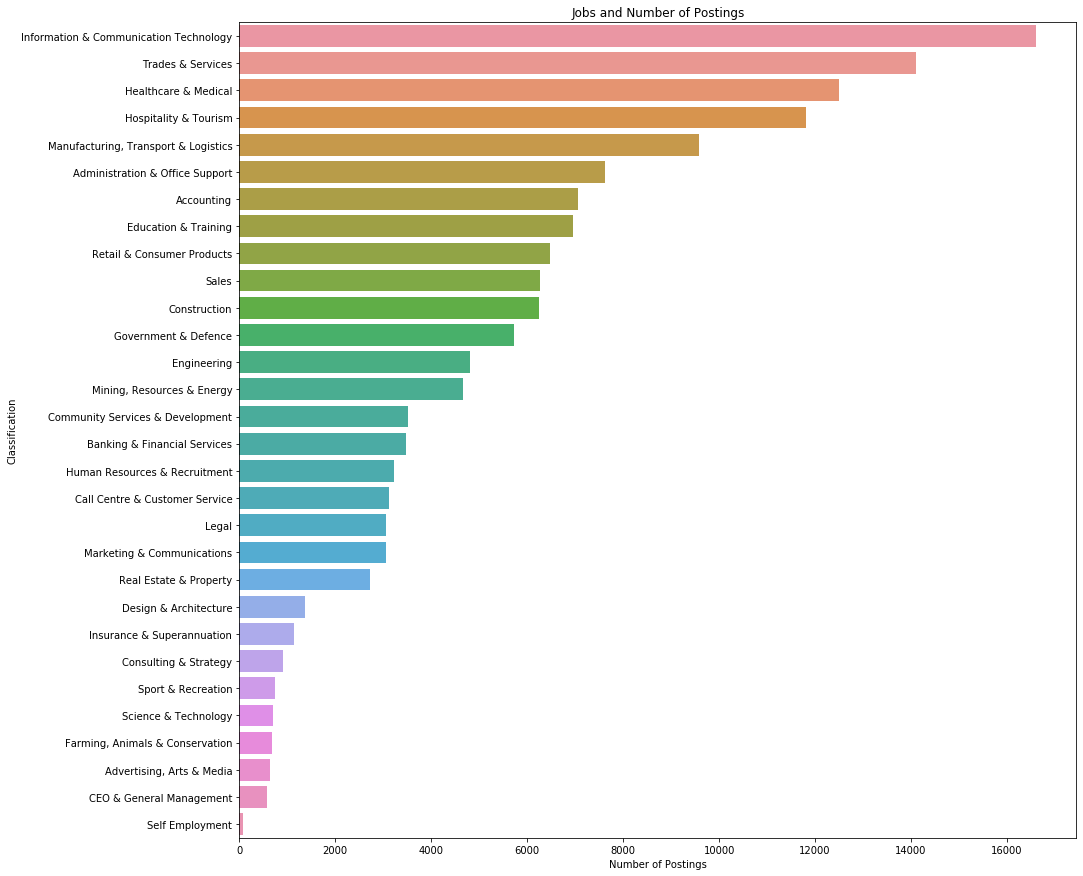

In [19]:
plt.figure(figsize=(15,15))
sns.countplot(y='Classification',data=df,order=df.Classification.value_counts().index)
plt.title('Jobs and Number of Postings')
plt.xlabel('Number of Postings')
plt.show()

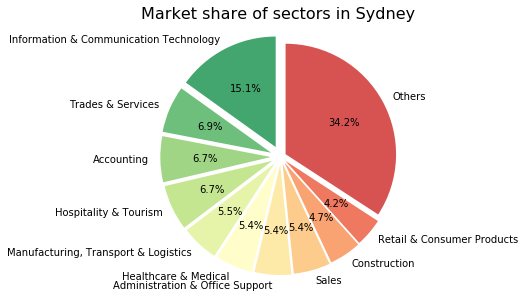

In [21]:
sydneyDf = df[df['Location']== "Sydney"]
sydneyDf = sydneyDf.groupby('Classification').count()
sydneyDf['Classification'] = sydneyDf.index
sydneyDf['Count'] = sydneyDf["Id"]
# Pie char for job market share of cities
from matplotlib import cm
sydneyDf = sydneyDf.sort_values(by=["Count"], ascending =False)
sydneyTop10Df = sydneyDf[:10].copy()
# #others
new_row = pd.DataFrame(data = {
    'Classification' : ['Others'],
    'Count' : [sydneyDf["Count"][10:].sum()]
})
sydneyTop10Df = pd.concat([sydneyTop10Df, new_row],sort=False)
sydneyTop10Df.index = sydneyTop10Df['Classification']
explode = [0.1-x*0.005 for x in range(len(sydneyTop10Df))]
plt.pie(sydneyTop10Df["Count"], labels=sydneyTop10Df["Classification"],colors=sns.color_palette("RdYlGn_r", len(sydneyTop10Df)), explode=explode, autopct='%1.1f%%', startangle=90,wedgeprops={'alpha':0.8})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.title('Market share of sectors in Sydney',size=16,loc='center')
plt.ylabel('')
plt.show()

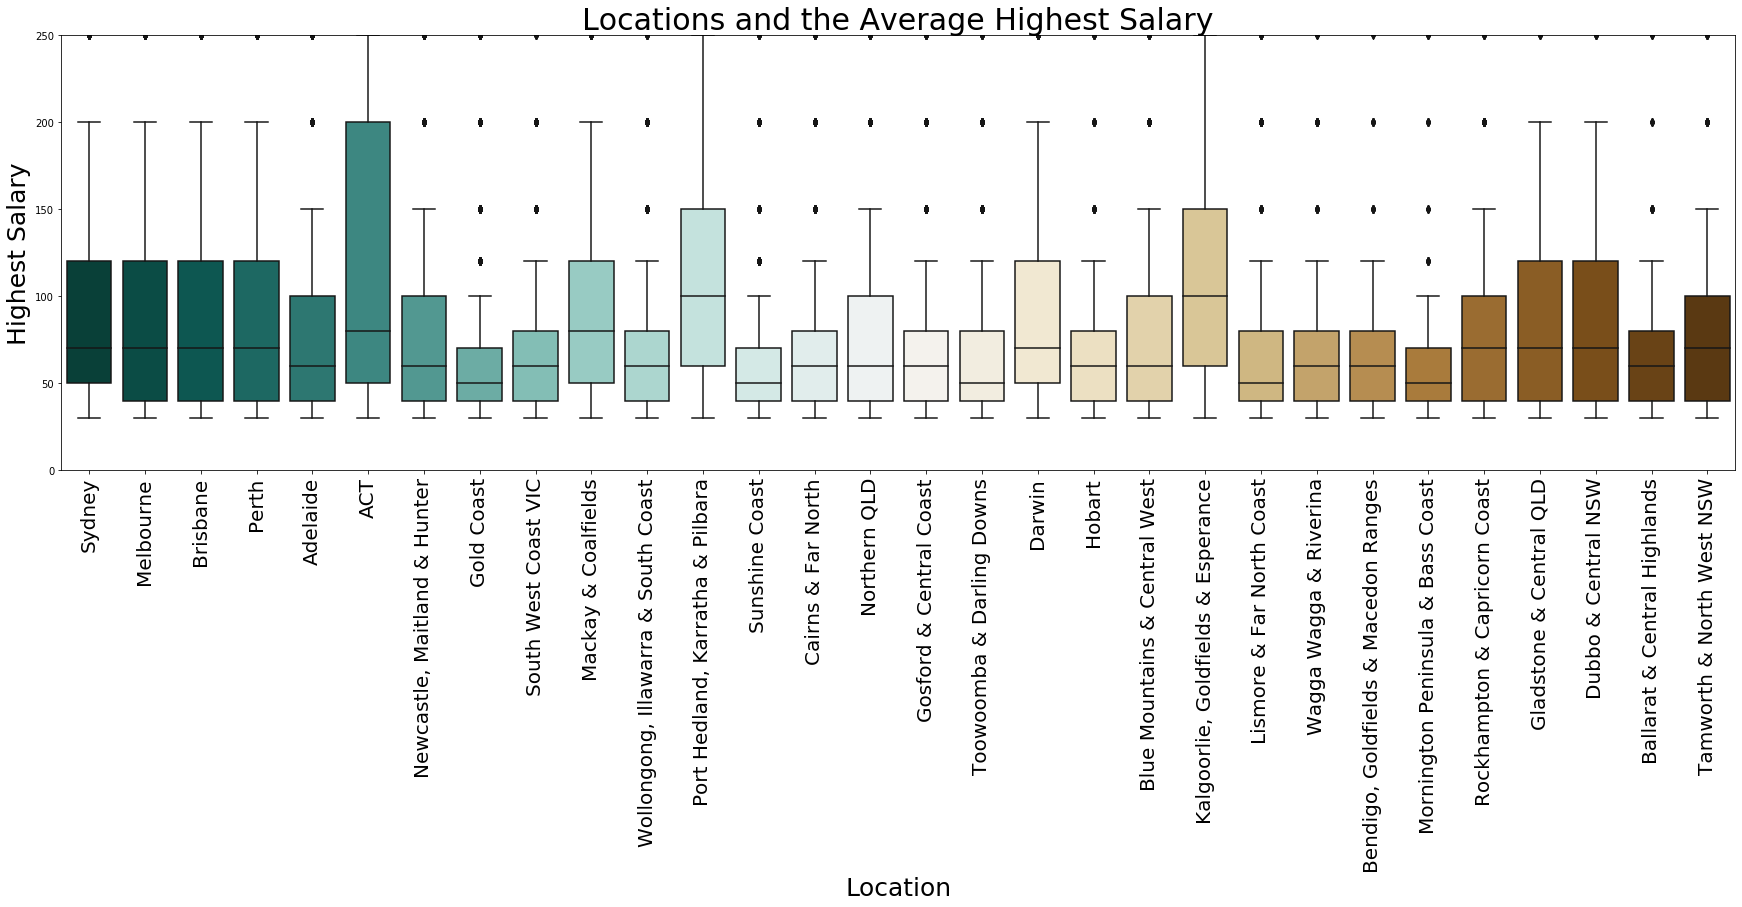

In [22]:
df_location = df[df['Location'].isna()==False]
df_top_30 = df_location.groupby(['Location']).count().reset_index().sort_values(by=['Title'],ascending=False)[:30]['Location'].tolist()
df_salary_locations_high = df[df['Location'].isin(df_top_30)]

plt.figure(figsize=(30,8))

box_plt_high = sns.boxplot(x='Location',y='HighestSalary',data=df_salary_locations_high, order=df_top_30,palette='BrBG_r')
box_plt_high.set_xticklabels(box_plt_high.get_xticklabels(),rotation=90,fontsize=20)
plt.title('Locations and the Average Highest Salary',size=30)
plt.ylabel('Highest Salary',fontsize=25)
plt.xlabel('Location',fontsize=25)

plt.ylim([0,250])
plt.show()

In [52]:
#Part 3 – Data Analysis and Interpretation in cities
#A. Analyse by comparison

In [23]:
degree_counts = df['Location'].value_counts()
degree_counts

Sydney                                  46168
Melbourne                               35185
Brisbane                                16461
Perth                                    9886
Adelaide                                 4971
                                        ...  
Coober Pedy & Outback SA                   74
Tumut, Snowy & Monaro                      69
Somerset & Lockyer                         56
Fleurieu Peninsula & Kangaroo Island       53
Central & South East TAS                   36
Name: Location, Length: 65, dtype: int64

In [24]:
Brisbane = df[df['Location'] == 'Brisbane'].groupby(by='JobType').count()
Sydney = df[df['Location'] == 'Sydney'].groupby(by='JobType').count()
print("Brisbane: \n{}". format(Brisbane))
print("Sydney: \n{}".format(Sydney))

Brisbane: 
                 Title  Company   Date  Location  Area  Classification  \
JobType                                                                  
Casual/Vacation   1537     1407   1537      1537  1369            1537   
Contract/Temp     3149     3120   3149      3149  2469            3149   
Full Time        10381     9930  10381     10381  8347           10381   
Part Time          982      926    982       982   887             982   

                 SubClassification  Requirement  FullDescription  \
JobType                                                            
Casual/Vacation               1537         1537             1535   
Contract/Temp                 3149         3149             3149   
Full Time                    10381        10381            10376   
Part Time                      982          982              982   

                 LowestSalary  HighestSalary  AverageSalary  SalaryRange  \
JobType                                                    

In [25]:
brisbaneDf = df[df['Location']=="Brisbane"]
brisbaneDf = brisbaneDf.groupby('Classification').count ()
brisbaneDf['Classification']=brisbaneDf.index
brisbaneDf['Count'] = brisbaneDf["Id"]
brisbaneDf = brisbaneDf.sort_values(by=["Count"], ascending = False)
brisbaneTop5Df = brisbaneDf[  :5].copy()
print(brisbaneTop5Df)

                                        Title  Company  Date  Location  Area  \
Classification                                                                 
Information & Communication Technology   2036     2008  2036      2036  1560   
Trades & Services                        1625     1508  1625      1625  1327   
Healthcare & Medical                     1336     1280  1336      1336  1033   
Manufacturing, Transport & Logistics     1335     1258  1335      1335  1177   
Hospitality & Tourism                    1030      964  1030      1030   931   

                                        SubClassification  Requirement  \
Classification                                                           
Information & Communication Technology               2036         2036   
Trades & Services                                    1625         1625   
Healthcare & Medical                                 1336         1336   
Manufacturing, Transport & Logistics                 1335         133

In [26]:
sydneyDf = df[df['Location']=="Sydney"]
sydneyDf = sydneyDf.groupby('Classification').count()
sydneyDf['Classification']=sydneyDf.index
sydneyDf['Count'] = sydneyDf["Id"]
sydneyDf = sydneyDf.sort_values(by=["Count"], ascending =False)
sydneyTop5Df = sydneyDf[  :5].copy()
print(sydneyTop5Df)

                                        Title  Company  Date  Location  Area  \
Classification                                                                 
Information & Communication Technology   6971     6829  6971      6971  6015   
Trades & Services                        3170     2883  3170      3170  2752   
Accounting                               3097     3030  3097      3097  2886   
Hospitality & Tourism                    3076     2982  3076      3076  2915   
Manufacturing, Transport & Logistics     2526     2349  2526      2526  2329   

                                        SubClassification  Requirement  \
Classification                                                           
Information & Communication Technology               6971         6971   
Trades & Services                                    3170         3170   
Accounting                                           3097         3097   
Hospitality & Tourism                                3076         307

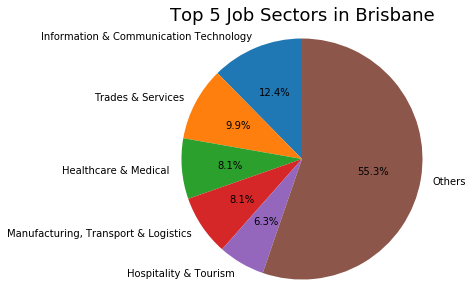

In [27]:
brisbaneDf = df[df['Location']=="Brisbane"]
brisbaneDf = brisbaneDf.groupby('Classification').count()
brisbaneDf['Classification']= brisbaneDf.index
brisbaneDf['Count'] = brisbaneDf["Id"]

from matplotlib import cm
brisbaneDf = brisbaneDf.sort_values(by=["Count"], ascending = False)
brisbaneTop5Df = brisbaneDf[:5].copy()
new_row = pd.DataFrame(data={
        'Classification': ['Others'],
        'Count' : [brisbaneDf["Count"][5:].sum()]
    })
    
brisbaneTop5Df = pd.concat([brisbaneTop5Df, new_row], sort=False)
brisbaneTop5Df.index = brisbaneTop5Df['Classification']
plt.pie(brisbaneTop5Df["Count"], labels = brisbaneTop5Df["Classification"], autopct='%1.1f%%', startangle = 90)
plt.axis('equal')
    
plt.tight_layout()
plt.title('Top 5 Job Sectors in Brisbane', size = 18, loc = 'center')
plt.ylabel('')
plt.show()

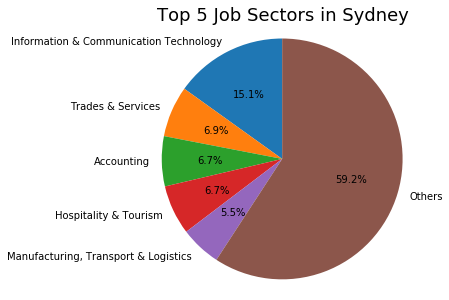

In [28]:
sydneyDf = df[df['Location']=="Sydney"]
sydneyDf = sydneyDf.groupby('Classification').count()
sydneyDf['Classification'] = sydneyDf.index
sydneyDf['Count'] = sydneyDf["Id"]

from matplotlib import cm
sydneyDf = sydneyDf.sort_values(by=["Count"], ascending = False)
sydneyTop5Df = sydneyDf[:5].copy()
new_row = pd.DataFrame(data={
    'Classification':['Others'],
    'Count': [sydneyDf["Count"][5:].sum()]
 })

sydneyTop5Df = pd.concat([sydneyTop5Df, new_row], sort = False)
sydneyTop5Df.index = sydneyTop5Df['Classification']
plt.pie(sydneyTop5Df["Count"], labels = sydneyTop5Df["Classification"], autopct = '%1.1f%%', startangle = 90)
plt.axis('equal')

plt.tight_layout()
plt.title('Top 5 Job Sectors in Sydney', size = 18, loc = 'center')
plt.ylabel('')
plt.show()

In [29]:
df_brislow = df[df["Location"]=="Brisbane"].groupby("LowestSalary").count()
df_brislow["LowestSalary"] = df_brislow.index
df_brislow["Count"] = df_brislow["Id"]
df_brislow = df_brislow.sort_values(by=["Count"], ascending =False)
print(df_brislow)

              Title  Company  Date  Location  Area  Classification  \
LowestSalary                                                         
0              2951     2822  2951      2951  2444            2951   
40             2265     2094  2265      2265  2034            2265   
60             1608     1532  1608      1608  1370            1608   
100            1484     1445  1484      1484  1091            1484   
50             1478     1384  1478      1478  1290            1478   
70             1383     1345  1383      1383  1112            1383   
80             1306     1266  1306      1306   986            1306   
150            1195     1187  1195      1195   851            1195   
30             1188     1129  1188      1188  1089            1188   
120            1058     1042  1058      1058   750            1058   
200             545      540   545       545   380             545   

              SubClassification  Requirement  FullDescription  HighestSalary  \
LowestSal

In [30]:
df_brishigh = df[df["Location"]=="Brisbane"].groupby("HighestSalary").count()
df_brishigh["HighestSalary"] = df_brishigh.index
df_brishigh["Count"] = df_brishigh["Id"]
df_brishigh = df_brishigh.sort_values(by=["Count"], ascending =False)
print(df_brishigh)

               Title  Company  Date  Location  Area  Classification  \
HighestSalary                                                         
30              2951     2822  2951      2951  2444            2951   
50              2265     2094  2265      2265  2034            2265   
70              1608     1532  1608      1608  1370            1608   
120             1484     1445  1484      1484  1091            1484   
60              1478     1384  1478      1478  1290            1478   
80              1383     1345  1383      1383  1112            1383   
100             1306     1266  1306      1306   986            1306   
200             1195     1187  1195      1195   851            1195   
40              1188     1129  1188      1188  1089            1188   
150             1058     1042  1058      1058   750            1058   
250              545      540   545       545   380             545   

               SubClassification  Requirement  FullDescription  LowestSalary

In [32]:
brisbaneDf = df[df['Location']=="Brisbane"]
brisbaneDf = brisbaneDf.groupby('Company').count()
brisbaneDf['Company']= brisbaneDf.index
brisbaneDf['Count'] = brisbaneDf['Company']
brisbaneDf

,Title,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,SalaryRange,Id,Company,Count
Company,,,,,,,,,,,,,,,,
121 Care Inc,1,1,1,1,1,1,1,1,1,1,1,1,1,1,121 Care Inc,121 Care Inc
1300 Smoke Alarms Pty Ltd,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1300 Smoke Alarms Pty Ltd,1300 Smoke Alarms Pty Ltd
1300hometutor,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1300hometutor,1300hometutor
13cabs,1,1,1,1,1,1,1,1,1,1,1,1,1,1,13cabs,13cabs
1iCT Pty Ltd,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1iCT Pty Ltd,1iCT Pty Ltd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
the agency,6,6,6,6,6,6,6,6,6,6,6,6,6,6,the agency,the agency
thyssenkrupp Industrial Solutions (Australia),2,2,2,2,2,2,2,2,2,2,2,2,2,2,thyssenkrupp Industrial Solutions (Australia),thyssenkrupp Industrial Solutions (Australia)
u&u. Recruitment Partners,191,191,191,113,191,191,191,188,191,191,188,191,191,191,u&u. Recruitment Partners,u&u. Recruitment Partners


In [33]:
sydneyDf = df[df['Location']=="Sydney"]
sydneyDf = sydneyDf.groupby('Company').count()
sydneyDf['Company']= sydneyDf.index
sydneyDf['Count'] =sydneyDf['Company']
sydneyDf

,Title,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,SalaryRange,Id,Company,Count
Company,,,,,,,,,,,,,,,,
Cincotta Chemist Caringbah Ian Hamilton,1,1,1,1,1,1,1,1,1,1,1,1,1,1,Cincotta Chemist Caringbah Ian Hamilton,Cincotta Chemist Caringbah Ian Hamilton
SBS Media,1,1,1,1,1,1,1,1,1,1,1,1,1,1,SBS Media,SBS Media
VGW,3,3,3,3,3,3,3,3,3,3,3,3,3,3,VGW,VGW
1 Smile Dental,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1 Smile Dental,1 Smile Dental
1001 Optical Pty. Ltd,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1001 Optical Pty. Ltd,1001 Optical Pty. Ltd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
www.yourhrteam.com.au,1,1,1,1,1,1,1,1,1,1,1,1,1,1,www.yourhrteam.com.au,www.yourhrteam.com.au
xtend recruitment,4,4,4,4,4,4,4,4,4,4,4,4,4,4,xtend recruitment,xtend recruitment
yd. Pty. Ltd,1,1,1,0,1,1,1,1,1,1,1,1,1,1,yd. Pty. Ltd,yd. Pty. Ltd


In [34]:
df["Date"] = df["Date"].replace(to_replace=r'T.*', value='', regex=True)
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,SalaryRange,Id
0,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0,0-30,0
1,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0,0-30,1
2,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0,0-30,2
3,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0,0-30,3
4,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0,0-30,4


In [53]:
#Part 3 – Data Analysis and Interpretation in cities
#B. Analyse by time

In [38]:
df["Date"] = df["Date"].replace(to_replace=r'T.*', value='', regex=True)
df["Date"] = pd.to_datetime(df["Date"])

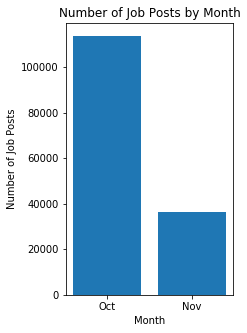

In [39]:
df_monthly_counts = df[df["Date"].isna()==False]
df_monthly_counts["Month"] =  [x.strftime("%b") for x in df_monthly_counts["Date"]]

df_monthly_counts = df_monthly_counts.groupby('Month').count()
df_monthly_counts['Label'] = df_monthly_counts.index
df_monthly_counts['Count'] = df_monthly_counts["Id"]
df_monthly_counts = df_monthly_counts.sort_values(by=['Count'], ascending = False)

plt.figure(figsize=(3,5))
plt.bar( df_monthly_counts['Label'], df_monthly_counts['Count'])

plt.title('Number of Job Posts by Month')
plt.ylabel('Number of Job Posts')
plt.xlabel('Month')
plt.show()

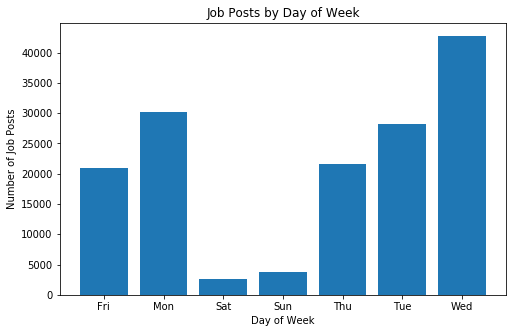

In [40]:
df_weekly_counts = df[df["Date"].isna()==False]
df_weekly_counts["Week"] =  [x.strftime("%a") for x in df_weekly_counts["Date"]]

df_weekly_counts = df_weekly_counts.groupby('Week').count()
df_weekly_counts['Label'] = df_weekly_counts.index
df_weekly_counts['Count'] = df_weekly_counts["Id"]

plt.figure(figsize=(8,5))
plt.bar( df_weekly_counts['Label'], df_weekly_counts['Count'])

plt.title('Job Posts by Day of Week')
plt.ylabel('Number of Job Posts')
plt.xlabel('Day of Week')
plt.show()

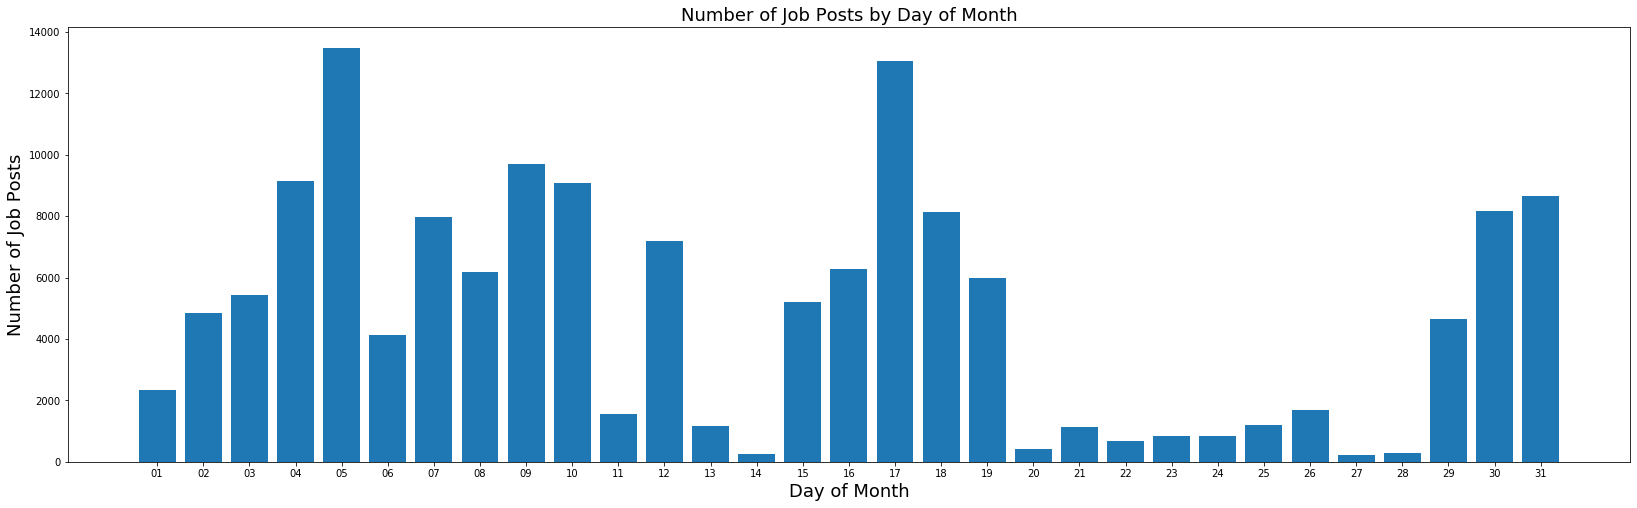

In [41]:
df_day_counts = df[df["Date"].isna()==False]
df_day_counts["DayOfMonth"] =  [x.strftime("%d") for x in df_day_counts["Date"]]

df_day_counts = df_day_counts.groupby('DayOfMonth').count()
df_day_counts['Label'] = df_day_counts.index
df_day_counts['Count'] = df_day_counts["Id"]

plt.figure(figsize=(28,8))
plt.bar( df_day_counts['Label'], df_day_counts['Count'])

plt.title('Number of Job Posts by Day of Month', size = 18)
plt.ylabel('Number of Job Posts', size = 18)
plt.xlabel('Day of Month', size = 18)
plt.show()

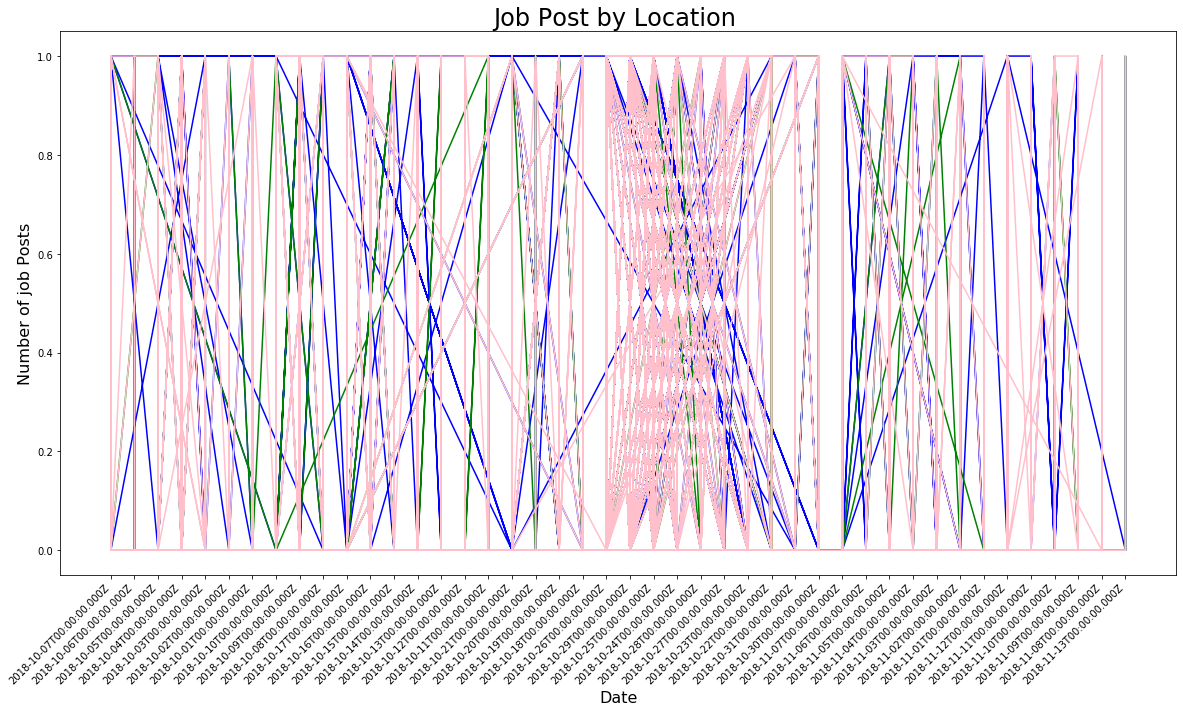

In [43]:
import datetime
plt.figure(figsize=(20,10))
df = pd.read_csv('data_assignment.csv')
df.head()

plt.plot(kind='line')
plt.title("Job Post by Location ", fontsize = 24)
plt.plot(df['Date'], df['Location']=="Sydney",c='blue')
plt.plot(df['Date'], df['Location']=="Brisbane", c='green')
plt.plot(df['Date'], df['Location']=="Melbourne",c='pink')
plt.xticks(rotation=45,  horizontalalignment='right')
plt.ylabel("Number of job Posts", fontsize = 16)
plt.xlabel("Date",fontsize = 16)
plt.show()

In [54]:
#Part 4 – Discussion

In [45]:
df["AverageSalary"] = (df["HighestSalary"] + df["LowestSalary"])/2

In [46]:
 df.loc[(df['Location'] == 'Brisbane') & (df['JobType'] == 'Part Time') & (df['AverageSalary'] >80) & (df['LowestSalary'] >80) & (df['HighestSalary'] <160) & (df['Area'] =='CBD & Inner Suburbs') ]

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
19135,37390365,Business Advisory Manager- Dynamic City Fringe...,MW Recruitment,2018-10-04T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Accounting,Business Services & Corporate Advisory,Progressive dynamic CA firm Step straight into...,<p><strong>The Firm</strong></p>\n ...,120,150,Part Time,135.0
20634,37370704,Onsite Physiotherapist Brisbane,ASAP Physiotherapy,2018-10-02T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Healthcare & Medical,"Physiotherapy, OT & Rehabilitation","Onsite Physiotherapist Role, Part Time Contrac...",<p><strong>Onsite Physiotherapist </strong></p...,120,150,Part Time,135.0
37846,37434187,Financial Accountant,Smart Technology Recruitment Pty Ltd,2018-10-10T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Accounting,Financial Accounting & Reporting,We are looking for a Part time Financial Accou...,<p>Our client is a successful technology compa...,100,120,Part Time,110.0
38101,37426485,"Clinical Nurse Specialist - Wound, Stoma and C...",UnitingCare Health,2018-10-10T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Healthcare & Medical,Nursing - General Medical & Surgical,St Andrews War Memorial are seeking an highly ...,<strong><p>At St Andrew’s War Memorial Hospita...,100,120,Part Time,110.0
40254,37426546,Business Advisory Manager- Dynamic City Fringe...,MW Recruitment,2018-10-10T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Accounting,Business Services & Corporate Advisory,Progressive dynamic CA firm Step straight into...,<p><strong>The Firm</strong></p>\n ...,120,150,Part Time,135.0
60937,37472055,Project Coordinator - Temp role,APRG - Attraction. Performance. Retention. Gui...,2018-10-15T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Information & Communication Technology,Programme & Project Management,Our client is needing a proactive Project Coor...,<p><strong>The Role</strong></p>\n <p>W...,100,120,Part Time,110.0
61169,37470325,Instrumental Music Teachers,Creative Kidz On Stage,2018-10-15T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Education & Training,Teaching - Primary,"Instrumental Music Teacher, negotiable pay to ...",<p>Creative Kidz On Stage are leaders in Instr...,100,120,Part Time,110.0
61268,37469720,Caseload midwife,My Midwives,2018-10-15T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Healthcare & Medical,"Nursing - Midwifery, Neo-Natal, SCN & NICU","Caseload midwife, preferably with a Medicare p...",<p>My Midwives is seeking a caseload midwife f...,100,120,Part Time,110.0
61593,37467722,Clinical Nurse - Cardiothoracic / Vascular,UnitingCare Health,2018-10-15T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Healthcare & Medical,Nursing - General Medical & Surgical,At St Andrew's War Memorial Hospital we're co...,<strong><p>At St Andrew’s War Memorial Hospita...,100,120,Part Time,110.0
105251,37600038,Senior Lecturer in Operations Research,The University of Queensland,2018-10-31T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Education & Training,Other,We are seeking a mathematician with a research...,<h2>The School of Mathematics and Physics</h2>...,100,120,Part Time,110.0


In [47]:
df.drop('AverageSalary', axis='columns', inplace = True)

In [48]:
df.head(2)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN


In [49]:
df['Classification'].value_counts()

Information & Communication Technology    16661
Trades & Services                         14125
Healthcare & Medical                      12515
Hospitality & Tourism                     11818
Manufacturing, Transport & Logistics       9608
Administration & Office Support            7636
Accounting                                 7075
Education & Training                       7033
Retail & Consumer Products                 6496
Sales                                      6281
Construction                               6254
Government & Defence                       5926
Engineering                                4812
Mining, Resources & Energy                 4679
Community Services & Development           3528
Banking & Financial Services               3481
Human Resources & Recruitment              3233
Call Centre & Customer Service             3127
Legal                                      3071
Marketing & Communications                 3052
Real Estate & Property                  